<h4>Authors Manisha Chandran and Vishwas Desai</h4>
<h3>Implementing Support Vector Regressor and Random Forest Regressor Model</h3> 

- ### Support Vector Regressor: 
SVR is a powerful algorithm that allows us to choose how tolerant we are of errors, both in terms of an acceptable error margin() and in terms of tuning our tolerance for exceeding that acceptable error rate. SVR recognizes the role of non-linearity in the data and offers an effective prediction model.


- ### Random Forest Regressor:
A Random Forest is an ensemble technique that uses several decision trees and a technique called Bootstrap and Aggregation, also known as bagging, to perform regression tasks. 



In [1]:
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR

In [2]:
from google.colab import files
uploaded = files.upload()

Saving trainset_2.csv to trainset_2.csv


### trainset_2.csv is the cleaned, noramlized and encoded data which has attrivutes like rating, budget, box office, positive rate, genres, and, actors

In [3]:
data= pd.read_csv("trainset_2.csv")
data.head()

,rating,budget,box_office,positive_rate,Adventure,Animation,Children,Comedy,Fantasy,Drama,Romance,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,Musical,War,IMAX,Documentary,Western,Film-Noir,(no genres listed),John Lasseter,Joe Johnston,Forest Whitaker,Michael Mann,Sydney Pollack,Peter Hyams,Martin Campbell,Rob Reiner,Mel Brooks,Ang Lee,Steve Oedekerk,Joseph Ruben,Barry Sonnenfeld,Richard Donner,John N. Smith,Terry Gilliam,...,Elodie Yung,Tsuwayuki Saotome,Taron Egerton,Edward Holcroft,Gordon Alexander,Joel Hogan,Josh Potthoff,Megan Peta Hill,Sarah Wright,Laurie Metcalf,Tracy Letts,Paapa Essiedu,Yassine Zeroual,Asan N'Jie,Anthony Gonzalez,Michael Stahl-David,Sally Hawkins,Jack Gore,Jet Jurgensmeyer,Nile Diaz,Lesley Manville,Lin Shaye,Walton Goggins,Storm Reid,Oprah Winfrey,Nick Robinson,Millicent Simmonds,Jóhannes Haukur Jóhannesson,Marcin Kowalczyk,John Cena,John Boyega,Cailee Spaeny,Rafe Spall,Sarah Vowell,Morena Baccarin,Joonas Suotamo,Lil Rel Howery,John David Washington,Isiah Whitlock Jr.,Amandla Stenberg
0,3.920930,0.001000,1.340000e-07,0.958333,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3.431818,0.001666,9.430000e-08,1.000000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2.357143,0.000533,2.920000e-08,0.200000,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3.946078,0.002000,4.300000e-08,0.760000,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3.185185,0.001933,3.130000e-08,0.880000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
data.shape

(2818, 5055)

In [5]:
columns_list = list(data.columns)
columns_list.remove('rating')
# columns_list

In [6]:
X = np.array(data[columns_list])
y = np.array(data["rating"])
y_shape = y.shape[0]
y = np.reshape(y, (y_shape, 1))
print(X.shape)
print(y.shape)

(2818, 5054)
(2818, 1)


#### Splitting the dataset into test and training sets

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#  X_train.shape, X_test.shape, y_train.shape, y_test.shape  --> ((2254, 5054), (564, 5054), (2254, 1), (564, 1))

# Support Vector Regressor

In [8]:
model = SVR()
model.fit(X_train, y_train)
print(model)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [9]:
y_expected  = y_test
y_pred = model.predict(X_test)

In [10]:
print(metrics.r2_score(y_expected, y_pred))
print('MSE',metrics.mean_squared_error(y_expected, y_pred))

0.24055582379799179
MSE 0.34950714027743907


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


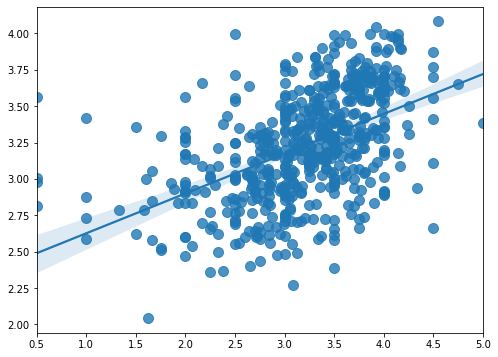

In [11]:
plt.figure(figsize=(8,6))
sns.regplot(y_expected, y_pred, fit_reg=True, scatter_kws={"s": 100})

## SVR gives out an r2 score of 0.24 and MSE of 0.34

##### Kernel: It allows us to locate a hyperplane in a higher-dimensional space while reducing the computational cost. As the size of the data becomes larger, the computing cost usually rises.

##### We use the Gaussian radial basis function (RBF) kernel for our model

------

# Random Forest Regressor


In [13]:
import time
from sklearn.ensemble import RandomForestRegressor

start = time.time()
rf=RandomForestRegressor(n_jobs=-1, n_estimators = 20, max_depth = 10, bootstrap = True) 
rf.fit(X_train,y_train)
end = time.time()


# prediction
pred=rf.predict(X_test)
len(pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


564

In [14]:
print(f"Time taken: {(end-start)}")

Time taken: 2.6597702503204346


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, pred)
print(f"MSE: {MSE}")

r2= r2_score(y_test, pred)
print(f"r2: {r2}")

MSE: 0.367437654398715
r2: 0.20159460396453854


## Random Forest Regressor gives an r2 score of 0.20 and a MSE of 0.36